In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Scaler/Network_Anomaly/Network_anomaly_data.csv')

In [5]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
df.nunique()

,0
duration,2981
protocoltype,3
service,70
flag,11
srcbytes,3341
dstbytes,9326
land,2
wrongfragment,3
urgent,4
hot,28


In [7]:
df=df.drop(['numoutboundcmds'],axis=1)

In [8]:
df.nunique()

,0
duration,2981
protocoltype,3
service,70
flag,11
srcbytes,3341
dstbytes,9326
land,2
wrongfragment,3
urgent,4
hot,28


In [9]:
df1=df.copy()

In [10]:
## New feature srcbytes/sec
df1['srcbytes/sec'] = df1.apply(lambda row : row['srcbytes']/row['duration'] if row['duration'] != 0 else row['srcbytes']/(row['duration'] + 0.001),axis=1 )

## New feature dstbytes/sec
df1['dstbytes/sec'] = df1.apply(lambda row : row['dstbytes']/row['duration'] if row['duration'] != 0 else row['dstbytes']/(row['duration'] + 0.001), axis=1)

In [11]:
##Creating new feature with  rate features with respective counts for Source hosts
## Create df1['serrorrate_count']
df1['serrorrate_count']=df1['serrorrate']*df1['count']

## Create df1['rerrorrate_count']
df1['rerrorrate_count']=df1['rerrorrate']*df1['count']

## Create df1['samesrvrate_count]
df1['samesrvrate_count']=df1['samesrvrate']*df1['count']

## Create df1['diffsrvrate_count']
df1['diffsrvrate_count']=df1['diffsrvrate']*df1['count']

In [12]:
##Create df1['srvserrorrate_count']
df1['srvserrorrate_count']=df1['srvserrorrate']*df1['srvcount']

##Create df1['srvrerrorrate_count']
df1['srvrerrorrate_count']=df1['srvrerrorrate']*df1['srvcount']

##Create df1['srvdiffhostrate_count']
df1['srvdiffhostrate_count']=df1['srvdiffhostrate']*df1['srvcount']

In [13]:
##Creating new feature with  rate features with respective counts for destination hosts

## Create df1[dsthosterrorrate_count']
df1['dsthostrerrorrate_count']=df1['dsthostserrorrate']*df1['dsthostcount']

## Create df1['dsthostserrorrate_count']
df1['dsthostserrorrate_count']=df1['dsthostserrorrate']*df1['dsthostcount']

## Create df1['dsthostsamesrvrate']
df1['dsthostsamesrvrate_count']=df1['dsthostsamesrvrate']*df1['dsthostcount']

## Create df1['dsthostdiffsrvrate']
df1['dsthostdiffsrvrate_count']=df1['dsthostdiffsrvrate']*df1['dsthostcount']

In [14]:
## Create df1['dsthostsrvserrorrate_count']
df1['dsthostsrvserrorrate_count']=df1['dsthostsrvserrorrate']*df1['dsthostsrvcount']

## Create df1['dsthostsrvrerrorrate_count']
df1['dsthostsrvrerrorrate_count']=df1['dsthostsrvrerrorrate']*df1['dsthostsrvcount']

## Create df1['dsthostsamesrcportrate_count']
df1['dsthostsamesrcportrate_count']=df1['dsthostsamesrcportrate']*df1['dsthostcount']

## Create df1['dsthostsrvdiffhostrate_count']
df1['dsthostsrvdiffhostrate_count']=df1['dsthostsrvdiffhostrate']*df1['dsthostsrvcount']

In [15]:
dfml=df1.copy()


In [16]:
dfml['attack_or_normal']=dfml['attack'].apply(lambda x: 1 if x!='normal' else 0)

In [17]:
dfml=dfml.drop(['attack','lastflag'],axis=1)
sum(dfml.isna().sum())

0

In [18]:
dfml.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'ishostlogin',
       'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate',
       'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'srcbytes/sec',
       'dstbytes/sec', 'serrorrate_count', 'rerrorrate_count',
       'samesrvrate_count', 'diffsrvrate_count', 'srvserrorrate_count',
       'srvrerrorrate_count', 'srvdiffhostrate_count',
       'dsthostrerrorrate_count', 'dsthostserrorrate_count',
       'dsthostsamesrvrate_

In [19]:
dfml.duplicated().sum()

9

In [20]:
dfml.drop_duplicates(keep='first',inplace=True)

In [21]:
##Split the data for training
X_train=dfml.drop(['attack_or_normal'],axis=1)
y_train=dfml['attack_or_normal']

##To ensures that the proportion of each class in the training and test sets have the same data sampling, use Stratified sampling during splitting the data.
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42,stratify=y_train)


In [22]:
X_train[X_train.duplicated(keep=False)]

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,srvrerrorrate_count,srvdiffhostrate_count,dsthostrerrorrate_count,dsthostserrorrate_count,dsthostsamesrvrate_count,dsthostdiffsrvrate_count,dsthostsrvserrorrate_count,dsthostsrvrerrorrate_count,dsthostsamesrcportrate_count,dsthostsrvdiffhostrate_count
37107,0,tcp,finger,S0,0,0,1,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
67588,0,tcp,finger,S0,0,0,1,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0
6922,0,icmp,ecr_i,SF,20,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
121116,0,tcp,finger,S0,0,0,1,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,5.0,0.0,1.0,5.0
16515,0,icmp,ecr_i,SF,20,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13210,0,tcp,finger,S0,0,0,1,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,5.0,0.0,1.0,5.0
72491,0,tcp,finger,S0,0,0,1,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0
89324,0,tcp,finger,S0,0,0,1,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [23]:
y_train[y_train.duplicated(keep=False)]

,attack_or_normal
93099,0
106668,1
37854,0
113322,1
113160,0
...,...
37150,1
32800,0
52379,0
84754,0


Since there are duplicates in both X_train and y_train, identify on both with 0's and remove the duplicates.

In [24]:
y_train_zero=(y_train==0)

In [25]:
X_train_zero=(X_train.duplicated(keep=False))

In [26]:
rows_to_keep = X_train[~(X_train_zero & y_train_zero)]


In [27]:
X_train=X_train.loc[rows_to_keep.index]
y_train=y_train.loc[rows_to_keep.index]
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [28]:
X_train.duplicated().sum()

0

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100767 entries, 0 to 100766
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      100767 non-null  int64  
 1   protocoltype                  100767 non-null  object 
 2   service                       100767 non-null  object 
 3   flag                          100767 non-null  object 
 4   srcbytes                      100767 non-null  int64  
 5   dstbytes                      100767 non-null  int64  
 6   land                          100767 non-null  int64  
 7   wrongfragment                 100767 non-null  int64  
 8   urgent                        100767 non-null  int64  
 9   hot                           100767 non-null  int64  
 10  numfailedlogins               100767 non-null  int64  
 11  loggedin                      100767 non-null  int64  
 12  numcompromised                100767 non-nul

For the model to get trained properly, all features to be encoded and normalised. In our dataset, we have 3 categorical features and these features need to be encoded.

Encode all the category features except service feature with One hot encoding as their nunique is not large.

For service feature, use label encoding in the descending order of their value counts.

Encode Train dataset first, then use those stats to encode test dataset to avoid target data leak.

In [30]:
##Categorical Encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
X_train_encoded=X_train.copy()

onehotencoder=OneHotEncoder(sparse_output=False,drop='first')
encoded_data=onehotencoder.fit_transform(X_train_encoded[['protocoltype','flag']])
##Since the encoded data is in list, convert it into dataframe
encoded_df=pd.DataFrame(encoded_data,columns=onehotencoder.get_feature_names_out(['protocoltype','flag']))

X_train_encoded=X_train_encoded.reset_index(drop=True)
encoded_df=encoded_df.reset_index(drop=True)

X_train_encoded = pd.concat([X_train_encoded.drop(columns=['protocoltype', 'flag']), encoded_df], axis=1)

# Get value counts from the training set and create encoding for 'service'
service_value_counts = X_train_encoded['service'].value_counts()
service_encoding = {category: rank for rank, category in enumerate(service_value_counts.index)}
X_train_encoded['service'] = X_train_encoded['service'].map(service_encoding)

In [31]:
sum(X_train_encoded.isna().sum())

0

In [32]:
##Repeat the above steps for Test data also

# Assuming nadp_X_test_binary is your test dataset
X_test_encoded = X_test.copy(deep=True)

# Transform 'protocoltype' and 'flag' columns using the fitted OneHotEncoder
encoded_test_data = onehotencoder.transform(X_test_encoded[['protocoltype', 'flag']])
encoded_test_df = pd.DataFrame(encoded_test_data, columns=onehotencoder.get_feature_names_out(['protocoltype', 'flag']))

# Reset index for both DataFrames
X_test_encoded = X_test_encoded.reset_index(drop=True)
encoded_test_df = encoded_test_df.reset_index(drop=True)

# Combine the original DataFrame with the encoded DataFrame
X_test_encoded = pd.concat([X_test_encoded.drop(columns=['protocoltype', 'flag']), encoded_test_df], axis=1)

# Apply frequency encoding for 'service' in the test dataset
X_test_encoded['service'] = X_test_encoded['service'].map(service_encoding)

# For any new service types in the test dataset that weren't in the training set, assign max + 1
max_service_value = X_train_encoded['service'].max()
X_test_encoded['service'].fillna(max_service_value + 1, inplace=True)

sum(X_test_encoded.isna().sum())

<ipython-input-32-cd6b3a61174b>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_encoded['service'].fillna(max_service_value + 1, inplace=True)


0

Scaling Train and Test data

In [33]:
##Scaling Train data

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_encoded)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_encoded.columns)

## Scaling test data
X_test_scaled=scaler.transform(X_test_encoded)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_encoded.columns)




Now the data is scaled and there may be chance of multicollinearity and it is common issue in large datasets.

Multicollinearity is when two or more independent variables (predictor variables) are highly correlated with each other.

 In other words, there lies a strong linear relationship between two or more predictor variables such that they do not provide any unique information for the regression analysis.

This higher degree of correlation can sometimes cause your machine-learning model to perform badly.


Multicollinearity, while seeming simple enough, can impact the interpretability and the overall performance of the models. The two most significant consequences of multicollinearity are:

Difficulty in Interpretation:

When two or more variables are correlated it becomes difficult to identify which one is driving the change in the dependent variable. i.e., it becomes hard to identify the individual significance of the predictor variables.

Reduced Model Predictive Power:

Collinearity in data increases the variance and leads to model overfitting that results in poor performance of the model on the unseen data at the time of inference. Also, the impact of each independent variable on the dependent variable can be calculated wrongly.

Variance Inflation Factor (VIF)

The most straightforward way to detect multicollinearity in data is using a metric called Variance Inflation Factor (VIF).

VIF identifies the correlation between independent variables and quantifies the strength of this correlation.

It starts with a value of 1 that indicates no correlation between independent variables. Values between 1 and 5 indicate a moderate correlation that likely has little impact.

A value greater than 5 represents a critical level of correlation in variables.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

def remove_worst_feature(X):
    vif = calculate_vif(X)
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)

    # Check if all VIF values are less than 10
    if vif["VIF"].max() < 10:
        return X  # Stop if all VIFs are acceptable

    # Remove the feature with the highest VIF
    worst_feature = vif["Features"].iloc[0]
    print(f"Removing feature: {worst_feature} with VIF: {vif['VIF'].iloc[0]}")

    # Recursively call the function with the reduced dataset
    return remove_worst_feature(X.drop(columns=[worst_feature]))

# VIF should be applied only among continuous features
X = X_train_scaled[['duration', 'service', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'ishostlogin',
       'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate',
       'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'srcbytes/sec',
       'dstbytes/sec', 'serrorrate_count', 'rerrorrate_count',
       'samesrvrate_count', 'diffsrvrate_count', 'srvserrorrate_count',
       'srvrerrorrate_count', 'srvdiffhostrate_count',
       'dsthostrerrorrate_count', 'dsthostserrorrate_count',
       'dsthostsamesrvrate_count', 'dsthostdiffsrvrate_count',
       'dsthostsrvserrorrate_count', 'dsthostsrvrerrorrate_count',
       'dsthostsamesrcportrate_count', 'dsthostsrvdiffhostrate_count']]
VIF_reduced = remove_worst_feature(X)

# The reduced dataset will have all VIFs < 10
print("Final features after VIF removal:", VIF_reduced.columns)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: dsthostserrorrate_count with VIF: inf
Removing feature: numroot with VIF: 1457.64
Removing feature: count with VIF: 358.66
Removing feature: srvserrorrate with VIF: 128.75
Removing feature: dsthostserrorrate with VIF: 73.69
Removing feature: srvrerrorrate with VIF: 63.24
Removing feature: dsthostsrvserrorrate with VIF: 48.23
Removing feature: srvcount with VIF: 35.12
Removing feature: dsthostsamesrvrate with VIF: 28.15
Removing feature: dsthostrerrorrate_count with VIF: 23.42
Removing feature: rerrorrate with VIF: 17.86
Removing feature: samesrvrate with VIF: 13.8
Removing feature: dsthostdiffsrvrate_count with VIF: 12.85
Final features after VIF removal: Index(['duration', 'service', 'srcbytes', 'dstbytes', 'land', 'wrongfragment',
       'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numfilecreations', 'numshells',
       'numaccessfiles', 'ishostlogin', 'isguestlogin', 'serrorrate',
       'diffsrvrate', 'srvdi

In [35]:

vif_reduced_columns= ['duration', 'service', 'srcbytes', 'dstbytes', 'land', 'wrongfragment',
       'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numfilecreations', 'numshells',
       'numaccessfiles', 'ishostlogin', 'isguestlogin', 'serrorrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'srcbytes/sec', 'dstbytes/sec', 'serrorrate_count', 'rerrorrate_count',
       'samesrvrate_count', 'diffsrvrate_count', 'srvserrorrate_count',
       'srvrerrorrate_count', 'srvdiffhostrate_count',
       'dsthostsamesrvrate_count', 'dsthostsrvserrorrate_count',
       'dsthostsrvrerrorrate_count', 'dsthostsamesrcportrate_count',
       'dsthostsrvdiffhostrate_count']
cat_features = ['flag_REJ','flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
                'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'isguestlogin',
                'ishostlogin','land', 'loggedin', 'protocoltype_tcp', 'protocoltype_udp',
                  'rootshell','service', 'suattempted']
final_selected_features = vif_reduced_columns + cat_features
print(f"Number of final_selected_features : {len(final_selected_features)}")
print(f"Number of features removed by VIF : {X_train_scaled.shape[1] - len(final_selected_features)}")

Number of final_selected_features : 61
Number of features removed by VIF : 6


In [36]:
vif = calculate_vif(X_train_scaled[vif_reduced_columns])
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
26,dsthostrerrorrate,9.36
31,rerrorrate_count,8.95
37,dsthostsamesrvrate_count,8.40
27,dsthostsrvrerrorrate,8.33
18,serrorrate,8.33
22,dsthostsrvcount,7.79
21,dsthostcount,6.91
33,diffsrvrate_count,6.54
24,dsthostsamesrcportrate,4.84
30,serrorrate_count,4.82


In [37]:
# Filter both the training and test datasets to keep only the selected features
X_train_final = X_train_scaled[final_selected_features]
X_test_final = X_test_scaled[final_selected_features]
y_train_final = y_train.copy(deep = True)
y_test_final = y_test.copy(deep = True)

In [38]:
X_train=X_train_final.copy()
y_train=y_train_final.copy()
X_test=X_test_final.copy()
y_test=y_test_final.copy()

In [39]:
#rows_to_keep

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,srvrerrorrate_count,srvdiffhostrate_count,dsthostrerrorrate_count,dsthostserrorrate_count,dsthostsamesrvrate_count,dsthostdiffsrvrate_count,dsthostsrvserrorrate_count,dsthostsrvrerrorrate_count,dsthostsamesrcportrate_count,dsthostsrvdiffhostrate_count
93099,0,tcp,http,SF,148,14602,0,0,0,0,...,0.0,0.00,0.0,0.0,255.00,0.00,0.00,0.0,0.00,0.00
106668,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.00,255.0,255.0,15.30,17.85,16.00,0.0,0.00,0.00
37854,0,tcp,http,SF,223,1378,0,0,0,0,...,0.0,0.00,0.0,0.0,15.00,0.00,0.00,0.0,1.05,6.66
113322,0,tcp,private,REJ,0,0,0,0,0,0,...,19.0,0.00,0.0,0.0,17.85,12.75,0.00,19.0,0.00,0.00
113160,0,tcp,smtp,S1,0,0,0,0,0,0,...,0.0,4.00,3.0,3.0,2.01,2.01,1.46,0.0,0.99,2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37150,0,tcp,netstat,REJ,0,0,0,0,0,0,...,20.0,0.00,0.0,0.0,20.40,17.85,0.00,20.0,0.00,0.00
32800,0,udp,domain_u,SF,44,133,0,0,0,0,...,0.0,2.85,0.0,0.0,112.64,2.56,0.00,0.0,112.64,2.00
52379,0,tcp,http,SF,195,272,0,0,0,0,...,0.0,0.00,0.0,0.0,9.00,0.00,0.00,0.0,0.99,12.75
84754,3,tcp,smtp,SF,1263,331,0,0,0,0,...,0.0,3.00,0.0,0.0,84.70,2.42,0.00,0.0,1.21,1.60


##Dimensions reduction using PCA and tSNE



In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.pipeline import Pipeline

def find_best_pca_components(X_train, explained_variance_threshold=0.95):
    n_features = X_train.shape[1]
    n_components = n_features  # Initialize n_components with the total number of features
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained_variance >= explained_variance_threshold) + 1
    return n_components

def apply_pca_tsne(X_train, X_test, pca_components=0.95, tsne_components=2):
    best_n_pca_components = find_best_pca_components(X_train, explained_variance_threshold=pca_components)

    pca = PCA(n_components=best_n_pca_components)
    tsne = TSNE(n_components=tsne_components)

    X_train = tsne.fit_transform(pca.fit_transform(X_train))
    X_test= tsne.fit_transform(pca.transform(X_test))

    return X_train, X_test

X_train, X_test = apply_pca_tsne(X_train, X_test, pca_components=0.95, tsne_components=2)

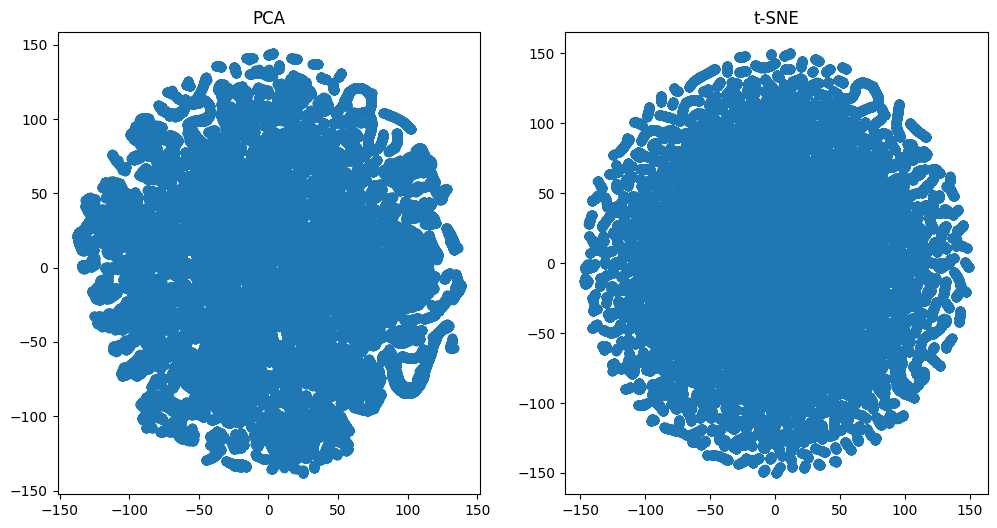

In [42]:
##Visualising the plot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)  # Replace 'X' with your data

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_train)  # Replace 'X' with your data

# Plot PCA and t-SNE results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE')

plt.show()

In [43]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


X_train = imputer.fit_transform(X_train)
X_test =  imputer.fit_transform(X_test)

In [44]:
##Cheking For Suitable Model
##K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3 , n_init=20)

kmeans.fit(X_train)

cluster_labels = kmeans.predict(X_test)



<function matplotlib.pyplot.show(close=None, block=None)>

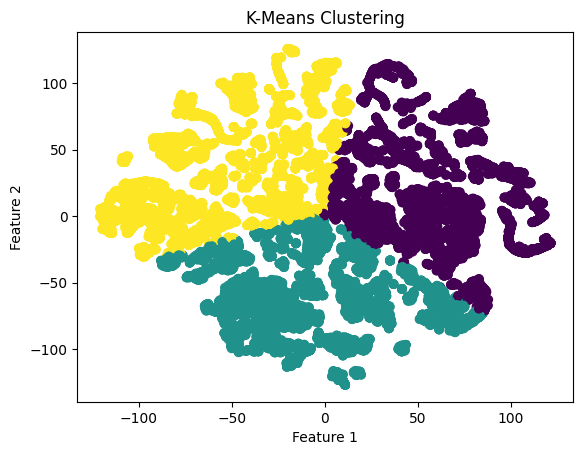

In [45]:
# Analysing

plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(X_test, cluster_labels)
print("Silhouette Score:", silhouette_avg)
# Evaluate the clustering using Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_test, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.36701432
Davies-Bouldin Index: 0.8817394974990247


Silhouette score is positive and very close to the decision boundary between two neighboring clusters.


DBI of around 0.79 indicates good clustering quality and since it is .87 we can predict as a good neighbouring cluster.

In [47]:

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

array([[ 24.228268, -70.548325],
       [-38.670708, -59.871624],
       [ 74.98332 ,  23.139666],
       ...,
       [113.14022 ,  32.17009 ],
       [ 11.661956,  29.135546],
       [-69.94785 , -30.895094]], dtype=float32)

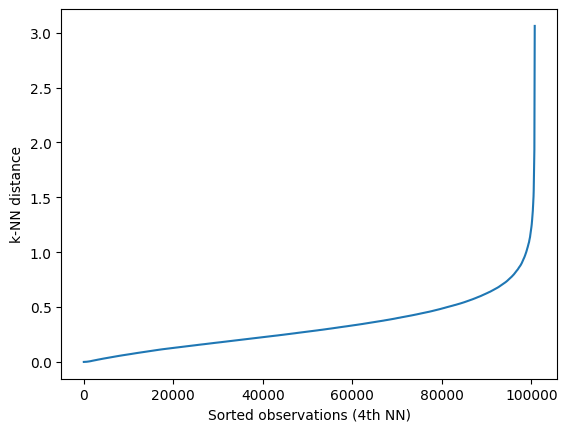

In [50]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_train)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_train)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In the k-NN distance plot, you should look for the “knee” or “elbow” point (a threshold value where you see a sharp change) of the curve to find the optimal value of ε.

Identifying the exact knee point could be difficult visually. In the below plot, the knee point can occur at any point between 1 to 2 i.e. the points below knee point belong to a cluster, and points above the knee point are noise or outliers (noise points will have higher kNN distance). You should run DBSCAN based on different values of ε (between 1 and 2) to find the best ε that gives the best clustering.

In [52]:
!pip install kneed

In [53]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

1.9299645795709084


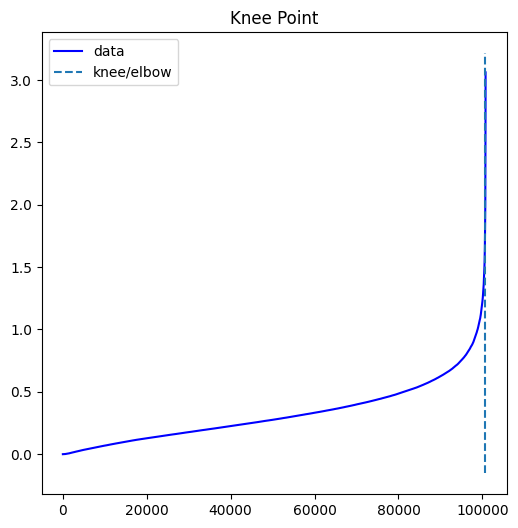

In [54]:
kneedle.plot_knee()
plt.show()

We will use 1.9 as optimum value of ε for DBSCAN clustering


In [66]:
clusters = DBSCAN(eps = 4.54, min_samples = 5).fit(X_train)
# get cluster labels
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'DBSCAN Clustering')

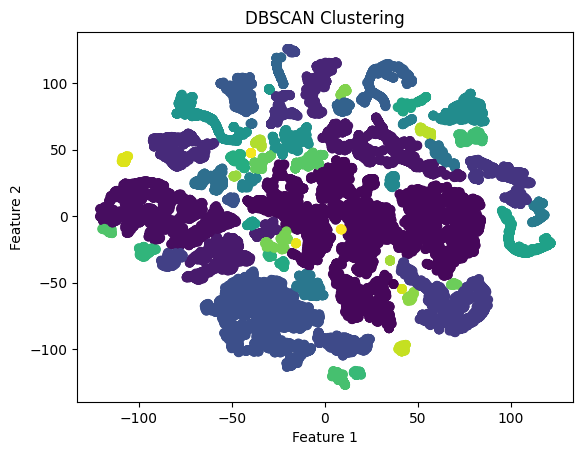

In [68]:
##Predicting and Plotting the clusters.
y_pred=clusters.fit_predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')

In [60]:
#Calculate Silhouette_Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(X_test, y_pred)
print("Silhouette Score:", silhouette_avg)
# Evaluate the clustering using Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_test, y_pred)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: -0.054298863
Davies-Bouldin Index: 0.8065124070216174


Silhouette score is negative and it indicates that samplea may be  assigned to wrong cluster

DBI of around 0.80 indicates good clustering quality and since it is .80 we can predict as a good neighbouring cluster.